> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - TMDB Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

 For this project I've chosen to utilize the TMDB Movies dataset to analyze. This data set is a cleaned dataset from TMDB with data pertaining to revenue and ratings for over 10,000 titles. 

Data included in the set are notated in columns such as the following:
    
    - Revenue
    - Popularity
    - Budgets
    - Title
    - Cast
    - Genre
    - Director
    - Tag Line
    - Run Time 
    - and more...

### Question(s) for Analysis

The questions we will explore are as follows:

    - How has the average profitability of movies changed over the years?
    - Does runtime affect popularity?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /Users/kaitlynklucznik/opt/anaconda3/lib/python3.7/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('tmdb-movies.csv')

df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.duplicated().sum()

1

In [6]:
df.shape

(10866, 21)

In [7]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

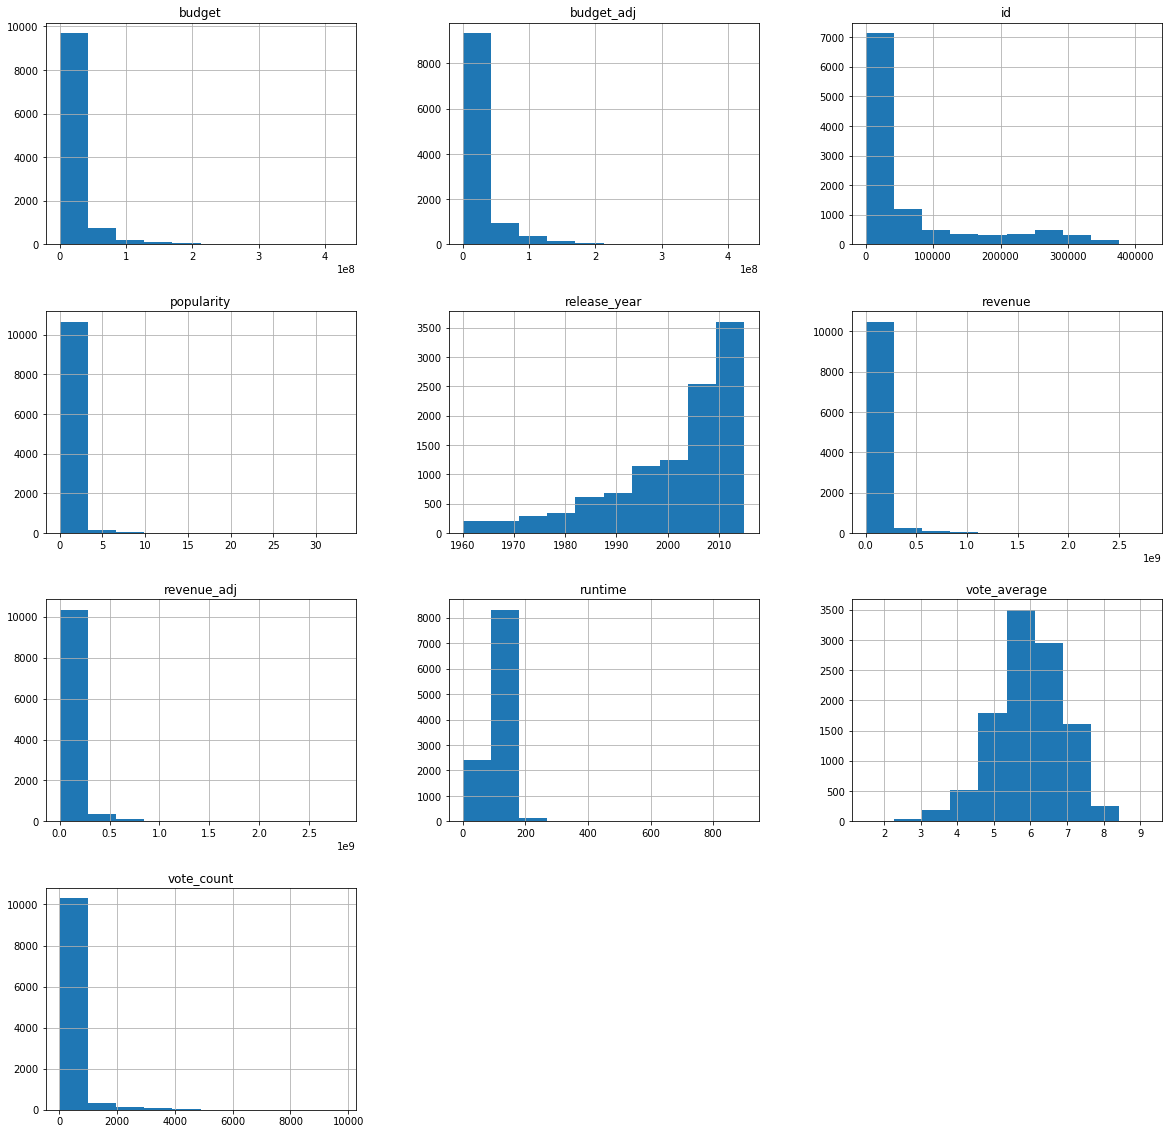

In [8]:
df.hist(figsize= (20,20));

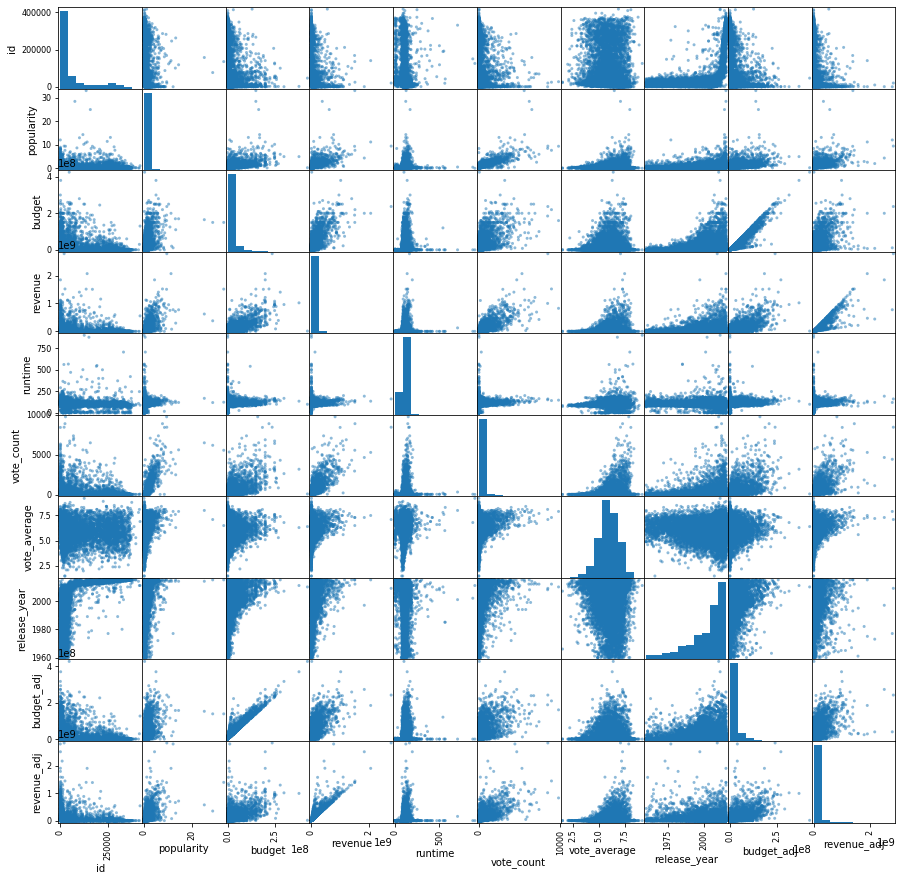

In [9]:
pd.plotting.scatter_matrix(df, figsize=(15,15));

### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

Based on the questions and data exploration above it became apparent that there would be several pieces of data that would need to be cleaned or purged from the data set. 

In order to make the data as streamlined as possible I determined the following:

    - Release date needed to be converted to data type of datetime. 
    - I drop columns that have no bearing on the questions I am looking to answer.
    - I remove the null or 0 data in the data set or replace it with an average where it makes sense. 
    - I remove duplicative data

In [10]:
# First thing is first. I drop the duplicate data from the data set. 

df.drop_duplicates(inplace=True)

In [11]:
# Next I convert the data type from a string to datetime for the release date. 

df['release_date']= pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj       

In [12]:
# Next, I move the title column to the front of the data set in order to make this more logically organized. 
first_column= df.pop('original_title')
df.insert(0, 'original_title', first_column)
df.head(2)

,original_title,id,imdb_id,popularity,budget,revenue,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,135397,tt0369610,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,76341,tt1392190,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [13]:
# Then I drop the columns that will not assist with answering the questions posed above. 

df= df.drop(['imdb_id','id','homepage','cast','tagline','overview', 'keywords','revenue_adj','budget_adj'], axis=1)
df.isnull().sum()

original_title             0
popularity                 0
budget                     0
revenue                    0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [14]:
# Here I drop the null values from the data set
df.dropna(inplace=True)
df.isnull().sum()

original_title          0
popularity              0
budget                  0
revenue                 0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [15]:
# Next I check for any 0 figures in runtime, budget, and revenue. 

(df['budget'] !=0).all()
(df['revenue']!=0).all()
(df['runtime']!=0).all()

False

In [16]:
#Next I replace 0 values with the average values those columns. 

df['budget']= df['budget'].replace(0, df['budget'].mean())
df['revenue']= df['revenue'].replace(0, df['revenue'].mean())
df['runtime']= df['runtime'].replace(0, df['runtime'].mean())

In [17]:
# Next I check everything worked as expected. 

(df['budget'] !=0).all()
(df['revenue']!=0).all()
(df['runtime']!=0).all()

True

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1: How has the average profitability of movies changed over the years?

In [18]:
#First I need to create a value for profitability. I do this by creating a new column called profitability
#and obtain the value by subtracting budget from revenue. 

df['profitability'] = df['revenue']- df['budget']

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 10865
Data columns (total 13 columns):
original_title          9806 non-null object
popularity              9806 non-null float64
budget                  9806 non-null float64
revenue                 9806 non-null float64
director                9806 non-null object
runtime                 9806 non-null float64
genres                  9806 non-null object
production_companies    9806 non-null object
release_date            9806 non-null datetime64[ns]
vote_count              9806 non-null int64
vote_average            9806 non-null float64
release_year            9806 non-null int64
profitability           9806 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 1.0+ MB


In [19]:
#I change the data type of profitability to an int since we're working with money. 

convert = {'revenue': int,
           'budget': int,
           'profitability':int}
df = df.astype(convert)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 10865
Data columns (total 13 columns):
original_title          9806 non-null object
popularity              9806 non-null float64
budget                  9806 non-null int64
revenue                 9806 non-null int64
director                9806 non-null object
runtime                 9806 non-null float64
genres                  9806 non-null object
production_companies    9806 non-null object
release_date            9806 non-null datetime64[ns]
vote_count              9806 non-null int64
vote_average            9806 non-null float64
release_year            9806 non-null int64
profitability           9806 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 1.0+ MB


In [27]:
#Next I create the average profitability grouped by year. 

year_profit = df.groupby('release_year')['profitability'].mean().astype(int)
print(year_profit)

release_year
1960    26687924
1961    29967032
1962    27616286
1963    27449845
1964    31031956
1965    38095696
1966    27959320
1967    36340358
1968    25404993
1969    32872988
1970    30102638
1971    29456318
1972    35839132
1973    40674808
1974    35336160
1975    39042999
1976    33338237
1977    53343810
1978    37230975
1979    39146975
1980    30514368
1981    32232981
1982    38226583
1983    29593620
1984    32362100
1985    28525474
1986    27204023
1987    32181178
1988    30946809
1989    41561433
1990    41093556
1991    37061061
1992    44160947
1993    38866827
1994    41945114
1995    48418911
1996    38276558
1997    45186433
1998    39430167
1999    41140469
2000    41861993
2001    48896785
2002    49825698
2003    48816820
2004    50076846
2005    41983871
2006    37665033
2007    45856041
2008    42554620
2009    46786403
2010    44666361
2011    46631347
2012    49633050
2013    44331987
2014    43872165
2015    51334635
Name: profitability, dtype: int64


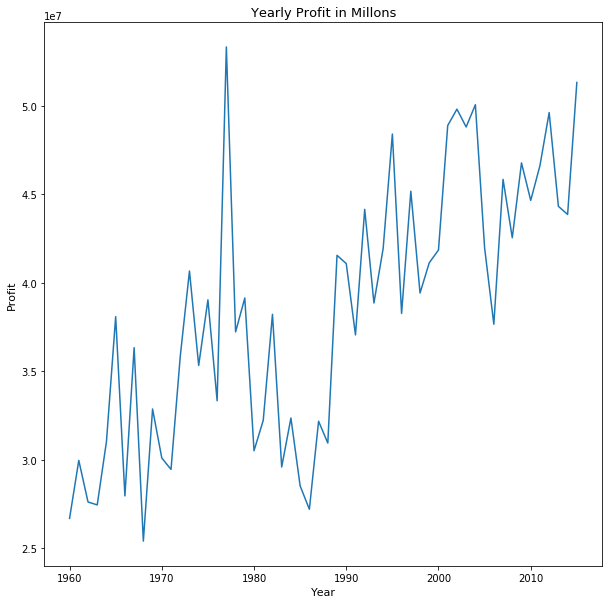

In [35]:
#To get a better idea of the changes I then create a line chart. 


plt.figure(figsize=(10,10))
plt.xlabel ('Year', fontsize= 11)
plt.ylabel ('Profit', fontsize=11)
plt.title ('Yearly Profit in Millons', fontsize=13)
plt.plot(year_profit)
plt.show()

As we can see based on the graph above, profit for movies has over all trended upwards with movies becoming more and more profitable as time goes on. There are a couple of anomolies however. An extremely high spike around 1977 and an extremely low dip around 1988. This could be an accurate depiction or the data could be slightly skewed due to the use of the budget and revenue means in place of 0 values. Overall though, profitability has trended in a positve upward direction steadily since 1960. 

### Research Question 2: Does run time affect popularity?

In [36]:
# I first look at the data for runtime and popularity. 

df['runtime'].describe()


count    9806.000000
mean      102.880550
std        27.884381
min         2.000000
25%        90.000000
50%       100.000000
75%       112.000000
max       877.000000
Name: runtime, dtype: float64

In [37]:
df['popularity'].describe()

count    9806.000000
mean        0.693143
std         1.035525
min         0.000188
25%         0.231581
50%         0.418755
75%         0.774232
max        32.985763
Name: popularity, dtype: float64

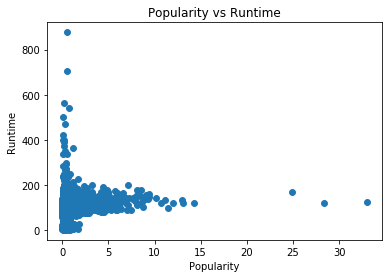

In [43]:
#After looking at the information available for each, I create a scatter plot to plot out runtime versus popularity. 

plt.scatter(df.popularity,df.runtime, s=35)
plt.xlabel('Popularity')
plt.ylabel('Runtime')
plt.title('Popularity vs Runtime');

In [44]:
#I next determine what the correlation of the two values is, as it's difficult to ascertain from the scatter plot.

df['popularity'].corr(df['runtime'])

0.15659706313043434

Based on the above we can see that there is a correlation coefficent of ~ .1566. This indicates a very weak positive correlation between the run time of a movie and it's popularity. While movies with a run time of 200 minutes or less tends to see more votes, while movies above this mark tend to recieve less votes, run time is not a good predictor if a movie will be popular or not. 

### Research Question 3: Does popularity affect profitability?

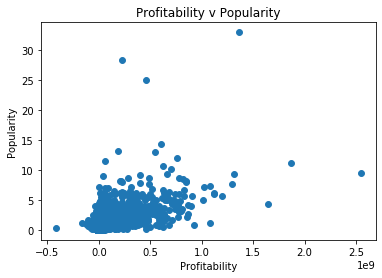

In [46]:
#I immediately create a scatter plot to find the correlation between popularity and profitability. 
plt.scatter(df.profitability, df.popularity, s=35)
plt.xlabel('Profitability')
plt.ylabel('Popularity')
plt.title('Profitability v Popularity');

In [47]:
df['profitability'].corr(df['popularity'])

0.5996522522972099

We can see there is a strong positive correlation between popularity and profitability. This would indicate that popularity is a good indicator on whether or not a movie will have a high profitability. 

# <a id='conclusions'></a>
## Conclusions

Based on the analysis of the two questions above, we can see that it's more profitable overall to create movies today versus in the past. 

We can also see that runtime is not a good indicator if a movie is more popular or not. But that popularity is a strong indicator on if a movie will be highly profitable or not. 

### Limitation

Some limitations were due to missing data. There were several lines of data lost due to null values and removing those null values from the data set. 

We may also have created a minor skew in the data by utilizing the average revenue, runtime, and budget in place of 0 values within the data.

## OPTIONAL: Question for the reviewer
 
If you have any question about the starter code or your own implementation, please add it in the cell below. 

For example, if you want to know why a piece of code is written the way it is, or its function, or alternative ways of implementing the same functionality, or if you want to get feedback on a specific part of your code or get feedback on things you tried but did not work.

Please keep your questions succinct and clear to help the reviewer answer them satisfactorily. 

> How can you utilize the .explode() function? I could not get it to work. 
> What is the most efficient way for breaking apart the Cast, Genre, and Production Company columns without making assumptions and dropping data?
> Any other overall advice to improve would also be appreciated.

In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255